In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size = tf.shape(data)[0]
        x = tf.random.uniform((batch_size, 1), minval=-5, maxval=5)  # Cambio de t a x, ajuste de rango de valores iniciales
        x_0 = tf.zeros((batch_size,1))
        
        with tf.GradientTape() as tape:
            # Cálculo de la pérdida y los gradientes
            with tf.GradientTape(persistent=True) as g:
                g.watch(x)
                g.watch(x_0)

                with tf.GradientTape() as gg:
                    gg.watch(x)    
                    y_pred = self(x, training=True)
                y_x = gg.gradient(y_pred, x)
                y_0 = self(x_0, training=True)

            ddy = g.gradient(y_x, x)
            dy_x0 = g.gradient(y_0, x_0)
            eq = ddy +  4*y_pred  # Ajuste de la ecuación diferencial
            ic = y_0 - 5.0  # Ajuste de la condición inicial y(0)
            ic1 = dy_x0  # Ajuste de la condición inicial y'(0)
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(0., ic1)

        # Aplicar gradientes
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Actualizar métricas
        self.loss_tracker.update_state(loss)
        # Devolver un diccionario que mapea nombres de métricas a valores actuales
        return {"loss": self.loss_tracker.result()}

In [12]:
# Crear modelo
model = ODEsolver()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))

model.add(Dense(1, activation='linear'))

In [13]:
model.summary()

Model: "od_esolver_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691 (2.70 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer=RMSprop(), metrics=['loss'])

x = tf.linspace(-5, 5, 1000)  # Ajusta el rango de tiempo
history = model.fit(x, epochs=1000, verbose=1)

x_testv = tf.linspace(-5,5, 1000)  # Ajusta el rango de tiempo
a = model.predict(x_testv)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 22.9551
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 17.6312
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 14.7662 
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.0858
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.9697
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.7572
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 13.3519
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.6090
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 13.1658
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14.1553
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 13.7102
Epoch 12/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13.3151
Epoch 13/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 13.7334
Epoch 14/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 12.4995
Epoch 15/1000
32/32 ━━━━━━━━━━━━

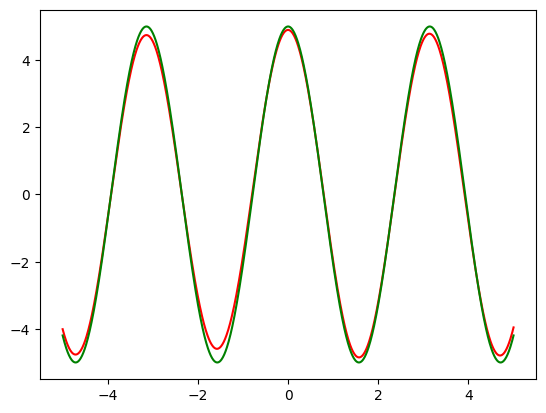

In [17]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv,5 * np.cos(2*x), color= 'green')
plt.show()

In [ ]:
plt.plot(x_testv,5 * np.cos(x), color= 'green')
plt.show()